In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
type(boston)

sklearn.datasets.base.Bunch

In [6]:
# built-in function to describe the sklearn dataset
print(boston.DESCR)

# observation: we'll use MEDV as the target value - the median value of a home

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

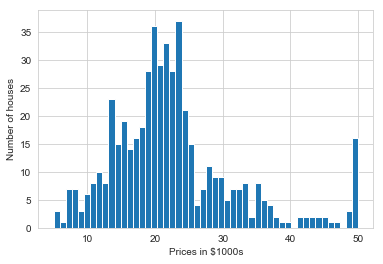

In [9]:
# lets do a quick visualization of the data

# lets start with a price histogram
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

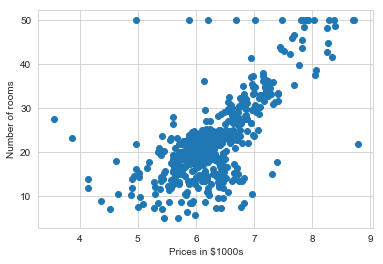

In [14]:
# let's look at a scatterplot of prices -vs- rooms per dwelling
# [:,5] is the 6th column - 'RM' ~ rooms per dwelling
# boston.target is also boston.data[:,13] -- the 14th data point
# however, this data is accessed via boston.target only

plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of rooms')

In [16]:
# lets transform this into pandas, then use seaborn for linear fitting
boston_df = DataFrame(boston.data)

# feature_names is another sklearn special function
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
# now we need to add the target data to the DataFrame
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


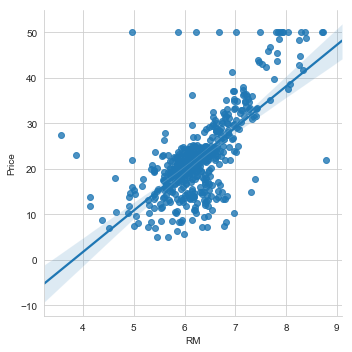

In [18]:
sns.lmplot('RM','Price',data=boston_df)

In [ ]:
## overview thus far
## imported data, visualized with seaborn and matplot
## moved data into DataFrame

In [ ]:
# review of 'best fit line' -- minimizing distance between individual points and fit-line

In [19]:
# let's setup the X-axis from room sizes 'RM'
X = boston_df.RM
# converts into a vector
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [23]:
# let's setup the Y-axis, the target value of prices
Y = boston_df.Price
Y.shape

(506,)

In [24]:
# need to use list comprehension to structure X as [X 1] matrix
X = np.array( [[value,1] for value in X] )
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [26]:
# least squares method (lstsq) from linear algebra (linalg) to creat slope (m) and y-intercept (b)
m,b = np.linalg.lstsq(X,Y)[0]

In [29]:
print('slope[m] = ',m,'y-int[b] = ',b)

slope[m] =  9.10210898118 y-int[b] =  -34.6706207764


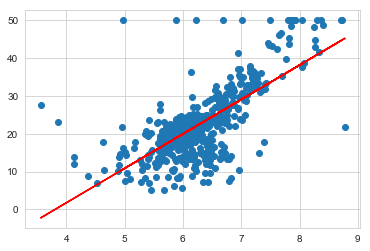

In [34]:
# lets re-create the scatterplot with best-fit line overlay
plt.plot(boston_df.RM,boston_df.Price,'o')
x = boston_df.RM
plt.plot(x,m*x+b,'r',label='Best Fit Line')

In [42]:
# lets get the root-mean squared error of our estimate
result = np.linalg.lstsq(X,Y)

# you'll know this from the machine learning documentation of linalg.lstsq method
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
print("Root Mean Square Error[RMSE] = ", round(rmse[0],3))

# observation --> RMSE means approx price of house will not vary by 2 * RMSE for 95% of the time

Root Mean Square Error[RMSE] =  6.603


In [43]:
'''
Now lets use SCIKIT LEARN
'''

'\nNow lets use SCIKIT LEARN\n'

In [45]:
import sklearn
from sklearn.linear_model import LinearRegression

In [48]:
# create a LinearRegression model
lreg = LinearRegression()
type(lreg)

sklearn.linear_model.base.LinearRegression

In [49]:
# we will use the 'fit','predict' and 'score' methods from LinearRegression

In [50]:
# data frame without target data
X_multi = boston_df.drop('Price',1)

In [51]:
# data of target 
Y_multi = boston_df.Price

In [52]:
lreg.fit(X_multi,Y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# check out -- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# for all method attributes and functions
print('The estimated intercept coeff is ',round(lreg.intercept_,2))
print('The number of coeff we used was', len(lreg.coef_))

The estimated intercept coeff is  36.49
The number of coeff we used was 13


In [54]:
# create new DataFrame of coefficients - features from original dataset and estimates from LinearReg object 'coef_'
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [57]:
# now let's test and train the datasets
# check out the documentation on "sklearn's train_test_split" function
# sklearn will automatically split the data unless explicitly defined
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [59]:
# check out the shapes of how sklearn has split the data
print('X-train', X_train.shape)
print('X-test', X_test.shape)
print('Y-train', Y_train.shape)
print('Y-test', Y_test.shape)

X-train (379, 2)
X-test (127, 2)
Y-train (379,)
Y-test (127,)


In [60]:
#let's measure the 
lreg2 = LinearRegression()
lreg2.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
# create 2 new arrays using LinearRegression prediction from X dataset
pred_train = lreg2.predict(X_train)
pred_test = lreg2.predict(X_test)

In [65]:
# lets get the mean square error of the test -vs- the train dataset

# how far off is Y-train from pred-train
print("Fit a model X_train, and calculate the MSE with Y_train:", 
      round(np.mean((Y_train - pred_train)**2),2))

# how far off is Y-test from pred-test
print("Fit a mdoel X_train and calculate MSE with X_test and Y_test",
     round(np.mean((Y_test - pred_test)**2),2))

Fit a model X_train, and calculate the MSE with Y_train: 48.41
Fit a mdoel X_train and calculaate MSE with X_test and Y_test 29.5


In [69]:
# residual plots
# residual = observed - predicted
# why is it important to check these?
# http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis


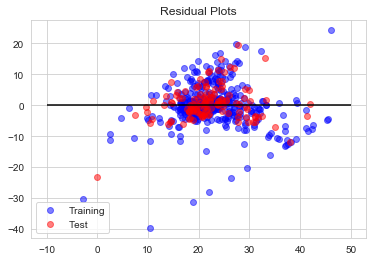

In [74]:
# recall, alpha controls transparency
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# draw a bold horizontal line across 0
plt.hlines(y=0,xmin=-10,xmax=50)

# controlling the legend and title
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')